In [5]:
import joblib

model=joblib.load('face-detect-model.sav')

In [26]:
from skimage import feature
import numpy as np

def detect(img,h=62,w=47,slide=5):
    
    coords=[]
    
    for y in range(0,img.shape[0]-h,slide):
        for x in range(0,img.shape[1]-w,slide):
            
            patch=img[y:y+h,x:x+w] 
            #print(patch.shape)
            hog_img=feature.hog(patch)
            label=model.predict([hog_img])
            
            if(label==1):
                
                coords.append((x,y,w,h))
                
    return np.array(coords)

(160, 140, 3)


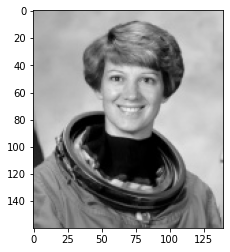

In [27]:
import cv2
from matplotlib import pyplot as plt

test_image=cv2.imread('test_data/test-img-1.jpg')
print(test_image.shape)
plt.imshow(test_image,cmap='gray')

In [28]:
gray=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
faces = detect(gray)

In [29]:
for x,y,w,h in faces:
    
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),1)

cv2.imshow('test_image',test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

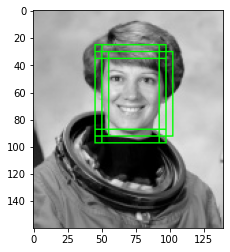

In [30]:
plt.imshow(test_image)